In [1]:
#import modules that will be helpful in our exploration
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import dataset

# Assign the filename: file
file = 'chesswithranks.csv'
# Read the file into a DataFrame: df
df = pd.read_csv(file)
df.head(2)
sns.set_theme()


# Lets divide the dataframes by skill

In [2]:
Bronze = df[df.white_rank == 'Bronze'] 
Silver = df[df.white_rank == 'Silver'] 
Gold = df[df.white_rank == 'Gold'] 
Platinum = df[df.white_rank == 'Platinum'] 
Diamond = df[df.white_rank == 'Diamond'] 
Onyx = df[df.white_rank == 'Onyx'] 
categories = [Bronze,Silver,Gold,Platinum,Diamond,Onyx]

# Build a test graph 

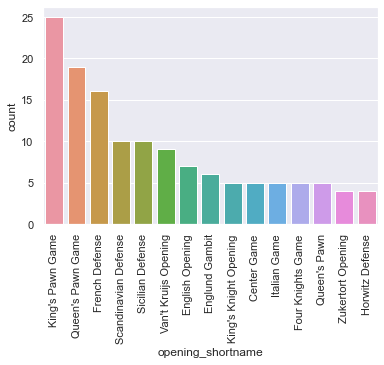

<Figure size 5040x3600 with 0 Axes>

In [3]:
#This is a test to write a function later, just getting the graph to look the way 

ax = sns.countplot(x='opening_shortname',
             data=Bronze,
             order=Bronze.opening_shortname.value_counts().head(15).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.figure(figsize = (70,50))
plt.show()

# Looks good. Now write a function to do it over a loop, with a label and extra information

In [4]:
def cat_opening(cat):
    ax = sns.countplot(x='opening_shortname',
             data=cat,
             order=cat.opening_shortname.value_counts().head(20).index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    print(cat.white_rank.value_counts())
    print(cat.opening_shortname.value_counts(normalize=True).head(15))
    plt.show()

# Now try it out

Bronze    193
Name: white_rank, dtype: int64
King's Pawn Game         0.129534
Queen's Pawn Game        0.098446
French Defense           0.082902
Scandinavian Defense     0.051813
Sicilian Defense         0.051813
Van't Kruijs Opening     0.046632
English Opening          0.036269
Englund Gambit           0.031088
King's Knight Opening    0.025907
Center Game              0.025907
Italian Game             0.025907
Four Knights Game        0.025907
Queen's Pawn             0.025907
Zukertort Opening        0.020725
Horwitz Defense          0.020725
Name: opening_shortname, dtype: float64


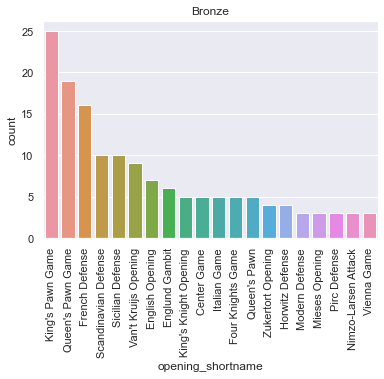

Silver    2230
Name: white_rank, dtype: int64
King's Pawn Game         0.091031
Sicilian Defense         0.081614
Queen's Pawn Game        0.069955
Van't Kruijs Opening     0.057399
French Defense           0.054260
Scandinavian Defense     0.053812
Philidor Defense         0.042601
Italian Game             0.038565
Queen's Gambit           0.035426
Ruy Lopez                0.033184
Four Knights Game        0.027803
Caro-Kann Defense        0.024664
English Opening          0.023318
King's Knight Opening    0.017489
Bishop's Opening         0.017040
Name: opening_shortname, dtype: float64


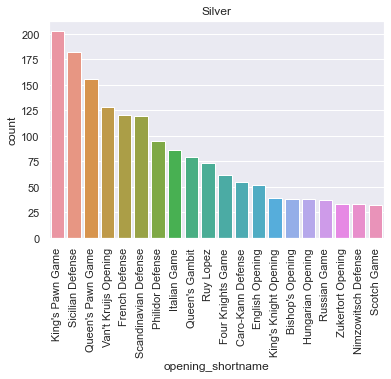

Gold    6131
Name: white_rank, dtype: int64
Sicilian Defense        0.118415
French Defense          0.072256
King's Pawn Game        0.061328
Queen's Pawn Game       0.057902
Italian Game            0.055619
Philidor Defense        0.043060
Ruy Lopez               0.041429
Queen's Gambit          0.041103
English Opening         0.038819
Scandinavian Defense    0.038493
Scotch Game             0.031316
Caro-Kann Defense       0.027565
Van't Kruijs Opening    0.021204
Bishop's Opening        0.019573
Four Knights Game       0.019573
Name: opening_shortname, dtype: float64


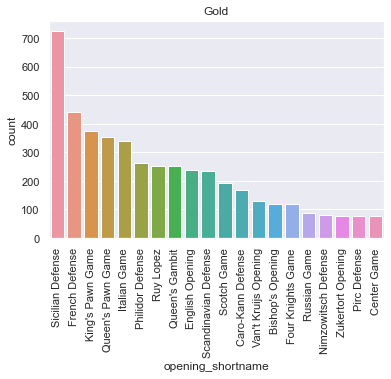

Platinum    3685
Name: white_rank, dtype: int64
Sicilian Defense        0.147897
French Defense          0.086567
Queen's Gambit          0.061058
Italian Game            0.060787
Queen's Pawn Game       0.060244
Ruy Lopez               0.041520
Philidor Defense        0.034464
Caro-Kann Defense       0.031479
English Opening         0.029579
Scandinavian Defense    0.028223
King's Pawn Game        0.026052
Scotch Game             0.022252
Indian Game             0.020353
Bishop's Opening        0.020081
Pirc Defense            0.018996
Name: opening_shortname, dtype: float64


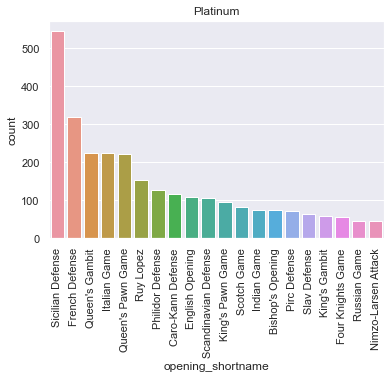

Diamond    3125
Name: white_rank, dtype: int64
Sicilian Defense         0.16448
French Defense           0.07968
Queen's Pawn Game        0.05952
Queen's Gambit           0.05440
Ruy Lopez                0.04768
English Opening          0.03840
Italian Game             0.03744
Caro-Kann Defense        0.03328
Scandinavian Defense     0.03104
Zukertort Opening        0.02528
King's Indian Defense    0.02368
Indian Game              0.02240
Slav Defense             0.02176
Philidor Defense         0.02048
Scotch Game              0.01856
Name: opening_shortname, dtype: float64


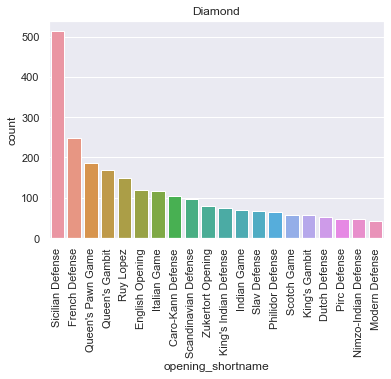

Onyx    791
Name: white_rank, dtype: int64
Sicilian Defense         0.192162
French Defense           0.078382
Queen's Pawn Game        0.061947
Queen's Gambit           0.053097
Ruy Lopez                0.048040
Caro-Kann Defense        0.046776
English Opening          0.045512
Italian Game             0.040455
Nimzo-Indian Defense     0.027813
Scandinavian Defense     0.025284
Indian Game              0.020228
Modern Defense           0.020228
King's Indian Defense    0.018963
Scotch Game              0.017699
Pirc Defense             0.016435
Name: opening_shortname, dtype: float64


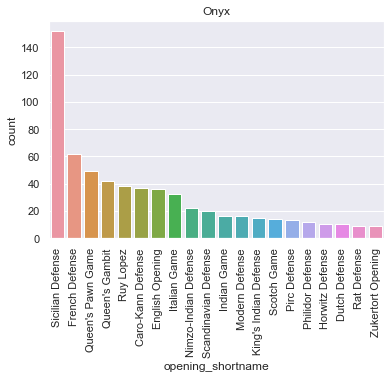

In [5]:
for cat in categories:
    cat_opening(cat)

# Wow there's a lot to break down here. Bronzes love to open with the King and Queen's Pawn game. 

# As player skill increases the use of the Sicilian Defense increases and the Queen's pawn game gets less popular and the King's pawn game almost disappears 

# Onyx level players use the Sicilian Defense most often. 

# Now lets analyze the amount of opening moves (# of moves following an opening pattern)

# We can repurpose our function to do this

In [6]:
def cat_moves(cat):
    ax = sns.countplot(x='opening_moves',
             data=cat,
             order=cat.opening_moves.value_counts().head(30).index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    print(cat.white_rank.value_counts())
    print(cat.opening_moves.value_counts(normalize=True).head(15))
    print(cat.opening_moves.describe())
    plt.show()

Bronze    193
Name: white_rank, dtype: int64
2     0.357513
3     0.233161
1     0.119171
4     0.108808
5     0.072539
6     0.062176
7     0.031088
8     0.010363
11    0.005181
Name: opening_moves, dtype: float64
count    193.000000
mean       3.062176
std        1.700573
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: opening_moves, dtype: float64


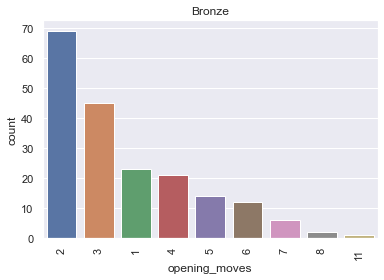

Silver    2230
Name: white_rank, dtype: int64
3     0.209865
4     0.191928
2     0.176682
1     0.114350
5     0.114350
6     0.078027
7     0.047982
8     0.037220
9     0.013453
10    0.005830
11    0.004933
13    0.002242
12    0.001345
17    0.000897
18    0.000448
Name: opening_moves, dtype: float64
count    2230.000000
mean        3.847534
std         2.174340
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        18.000000
Name: opening_moves, dtype: float64


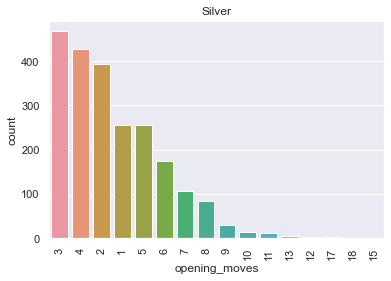

Gold    6131
Name: white_rank, dtype: int64
3     0.207307
4     0.175665
2     0.147937
5     0.134888
6     0.106508
7     0.066873
1     0.059207
8     0.042734
9     0.024629
10    0.015169
11    0.012885
12    0.002936
13    0.001794
14    0.000489
17    0.000326
Name: opening_moves, dtype: float64
count    6131.000000
mean        4.400424
std         2.316758
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: opening_moves, dtype: float64


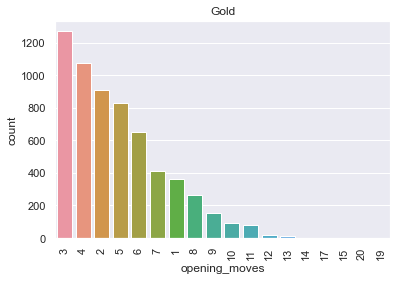

Platinum    3685
Name: white_rank, dtype: int64
4     0.167436
5     0.156852
3     0.150611
2     0.128358
6     0.109091
8     0.069471
7     0.069199
9     0.040977
1     0.040706
11    0.026323
10    0.021981
13    0.008955
12    0.005156
14    0.002171
16    0.001085
Name: opening_moves, dtype: float64
count    3685.000000
mean        5.030393
std         2.669274
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        19.000000
Name: opening_moves, dtype: float64


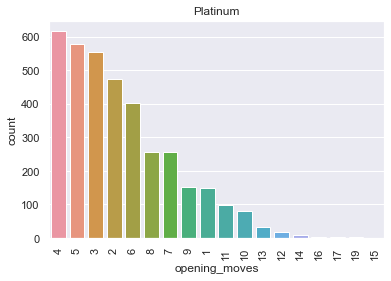

Diamond    3125
Name: white_rank, dtype: int64
4     0.14816
5     0.13728
3     0.12800
2     0.12736
6     0.10656
7     0.08064
8     0.07424
9     0.04864
10    0.03776
11    0.03552
1     0.02368
12    0.01632
13    0.01472
14    0.00672
15    0.00448
Name: opening_moves, dtype: float64
count    3125.000000
mean        5.678400
std         3.242533
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        28.000000
Name: opening_moves, dtype: float64


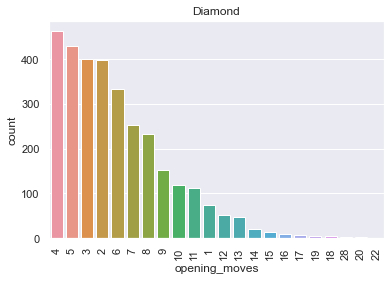

Onyx    791
Name: white_rank, dtype: int64
5     0.128951
6     0.106195
4     0.104930
2     0.097345
3     0.088496
8     0.082174
7     0.080910
9     0.073325
10    0.053097
11    0.050569
12    0.030341
1     0.022756
15    0.020228
17    0.017699
13    0.016435
Name: opening_moves, dtype: float64
count    791.000000
mean       6.756005
std        3.802715
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       24.000000
Name: opening_moves, dtype: float64


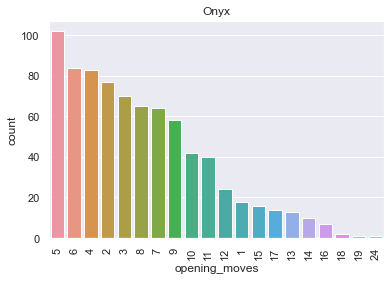

In [7]:
for cat in categories:
    cat_moves(cat)

# That is a lot to take in all at once, so lets go over how the rankings look

# Lets take a look at these groups in a histogram of the dataset

<AxesSubplot:xlabel='white_rating', ylabel='Count'>

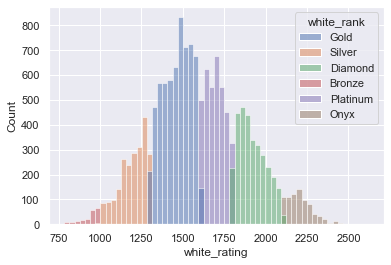

In [8]:
sns.histplot(x='white_rating',
             data=df,
            hue='white_rank')

# You can see most of the games are silver to diamond in rating, with the majority being gold. Lets see how these different groups play!





# Now lets start with Bronze, our lowest category. These players are ranked up to 1000 which is considered beginner in the chess community. These games represent 1.4% of games in this dataset (the smallest section of data)

Bronze    193
Name: white_rank, dtype: int64
King's Pawn Game         0.129534
Queen's Pawn Game        0.098446
French Defense           0.082902
Scandinavian Defense     0.051813
Sicilian Defense         0.051813
Van't Kruijs Opening     0.046632
English Opening          0.036269
Englund Gambit           0.031088
King's Knight Opening    0.025907
Center Game              0.025907
Italian Game             0.025907
Four Knights Game        0.025907
Queen's Pawn             0.025907
Zukertort Opening        0.020725
Horwitz Defense          0.020725
Name: opening_shortname, dtype: float64


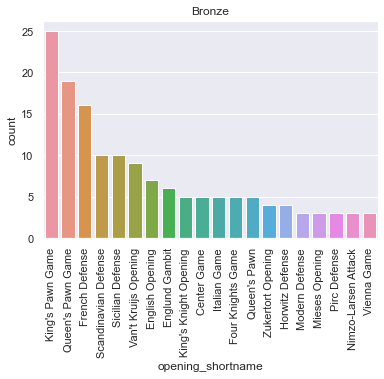

Bronze    193
Name: white_rank, dtype: int64
2     0.357513
3     0.233161
1     0.119171
4     0.108808
5     0.072539
6     0.062176
7     0.031088
8     0.010363
11    0.005181
Name: opening_moves, dtype: float64
count    193.000000
mean       3.062176
std        1.700573
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: opening_moves, dtype: float64


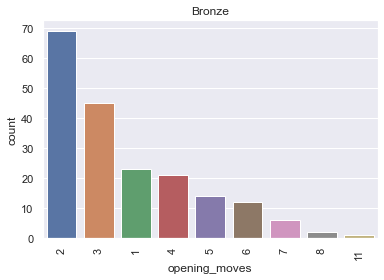

(None, None)

In [9]:
cat_opening(Bronze),cat_moves(Bronze)

# Bronze players most commonly open with King (13%) and Queen's Pawn (9%) games, and follow those patterns for an average of 3.06 moves (2 moves being the most frequent option) before doing something "on their own", or not following the sequence

# Now lets look at Silvers. These are people rated between 1000 and 1300. This is considered an amateur rating. Games at this skill level are 14% of the games in the dataset. 

Silver    2230
Name: white_rank, dtype: int64
King's Pawn Game         0.091031
Sicilian Defense         0.081614
Queen's Pawn Game        0.069955
Van't Kruijs Opening     0.057399
French Defense           0.054260
Scandinavian Defense     0.053812
Philidor Defense         0.042601
Italian Game             0.038565
Queen's Gambit           0.035426
Ruy Lopez                0.033184
Four Knights Game        0.027803
Caro-Kann Defense        0.024664
English Opening          0.023318
King's Knight Opening    0.017489
Bishop's Opening         0.017040
Name: opening_shortname, dtype: float64


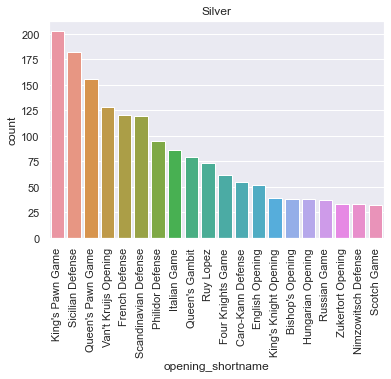

Silver    2230
Name: white_rank, dtype: int64
3     0.209865
4     0.191928
2     0.176682
1     0.114350
5     0.114350
6     0.078027
7     0.047982
8     0.037220
9     0.013453
10    0.005830
11    0.004933
13    0.002242
12    0.001345
17    0.000897
18    0.000448
Name: opening_moves, dtype: float64
count    2230.000000
mean        3.847534
std         2.174340
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        18.000000
Name: opening_moves, dtype: float64


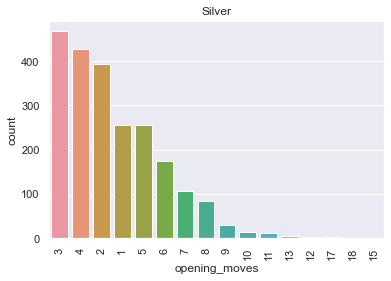

(None, None)

In [10]:
cat_opening(Silver),cat_moves(Silver)

# Silvers have a larger variety of options they play with (likely unknowlingly) and commit to their openings longer than Bronzes, and average of 3.8 moves with 3 being the most frequent. 

# Now lets look at Gold. Golds are rated between 1300-1600 and are "good" players. These aren't tournament winners or grandmasters but will definitely beat anyone in the general population. This is by far the largest chunk of players in this dataset, representing 38% of games in the dataset.

Gold    6131
Name: white_rank, dtype: int64
Sicilian Defense        0.118415
French Defense          0.072256
King's Pawn Game        0.061328
Queen's Pawn Game       0.057902
Italian Game            0.055619
Philidor Defense        0.043060
Ruy Lopez               0.041429
Queen's Gambit          0.041103
English Opening         0.038819
Scandinavian Defense    0.038493
Scotch Game             0.031316
Caro-Kann Defense       0.027565
Van't Kruijs Opening    0.021204
Bishop's Opening        0.019573
Four Knights Game       0.019573
Name: opening_shortname, dtype: float64


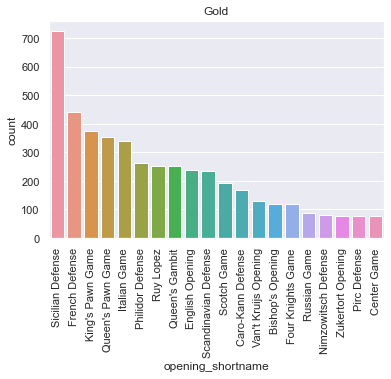

Gold    6131
Name: white_rank, dtype: int64
3     0.207307
4     0.175665
2     0.147937
5     0.134888
6     0.106508
7     0.066873
1     0.059207
8     0.042734
9     0.024629
10    0.015169
11    0.012885
12    0.002936
13    0.001794
14    0.000489
17    0.000326
Name: opening_moves, dtype: float64
count    6131.000000
mean        4.400424
std         2.316758
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: opening_moves, dtype: float64


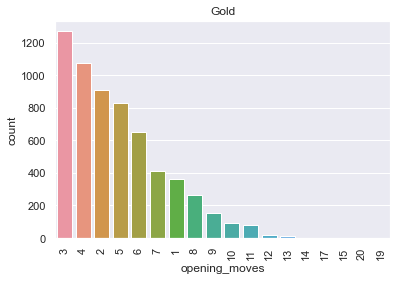

(None, None)

In [11]:
cat_opening(Gold),cat_moves(Gold)

# Golds are more likely to follow an opening for 7 moves than 1, and are the first group to have the Sicilian Defense as their number 1 opening. This will continue through the rest of the ranks. 

# Time to analyze Platinum, a group of very strong players. They are ranked between 1600-1900 and represent advanced players. These are people who may not have made it professionally but are truly gifted at the game. They represent 22.4% of the player base

Platinum    3685
Name: white_rank, dtype: int64
Sicilian Defense        0.147897
French Defense          0.086567
Queen's Gambit          0.061058
Italian Game            0.060787
Queen's Pawn Game       0.060244
Ruy Lopez               0.041520
Philidor Defense        0.034464
Caro-Kann Defense       0.031479
English Opening         0.029579
Scandinavian Defense    0.028223
King's Pawn Game        0.026052
Scotch Game             0.022252
Indian Game             0.020353
Bishop's Opening        0.020081
Pirc Defense            0.018996
Name: opening_shortname, dtype: float64


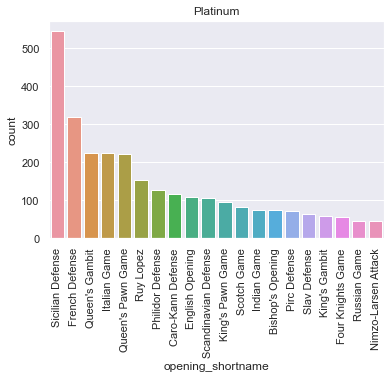

Platinum    3685
Name: white_rank, dtype: int64
4     0.167436
5     0.156852
3     0.150611
2     0.128358
6     0.109091
8     0.069471
7     0.069199
9     0.040977
1     0.040706
11    0.026323
10    0.021981
13    0.008955
12    0.005156
14    0.002171
16    0.001085
Name: opening_moves, dtype: float64
count    3685.000000
mean        5.030393
std         2.669274
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        19.000000
Name: opening_moves, dtype: float64


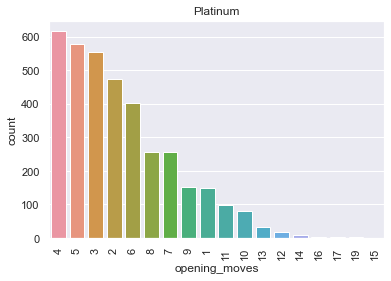

(None, None)

In [12]:
cat_opening(Platinum),cat_moves(Platinum)

# Platinum ranked players commit to their opening an average of 5 moves with 4 moves being the most repeated number. They use the Sicialian defense opening twice as much as any other opening. 

# Now lets look at diamonds, our second to the top group. They represent players from 1800-2100 rating bracket and are tremendously skilled players. They represent 19% of the dataset

Diamond    3125
Name: white_rank, dtype: int64
Sicilian Defense         0.16448
French Defense           0.07968
Queen's Pawn Game        0.05952
Queen's Gambit           0.05440
Ruy Lopez                0.04768
English Opening          0.03840
Italian Game             0.03744
Caro-Kann Defense        0.03328
Scandinavian Defense     0.03104
Zukertort Opening        0.02528
King's Indian Defense    0.02368
Indian Game              0.02240
Slav Defense             0.02176
Philidor Defense         0.02048
Scotch Game              0.01856
Name: opening_shortname, dtype: float64


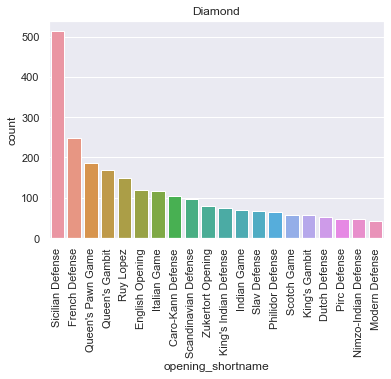

Diamond    3125
Name: white_rank, dtype: int64
4     0.14816
5     0.13728
3     0.12800
2     0.12736
6     0.10656
7     0.08064
8     0.07424
9     0.04864
10    0.03776
11    0.03552
1     0.02368
12    0.01632
13    0.01472
14    0.00672
15    0.00448
Name: opening_moves, dtype: float64
count    3125.000000
mean        5.678400
std         3.242533
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        28.000000
Name: opening_moves, dtype: float64


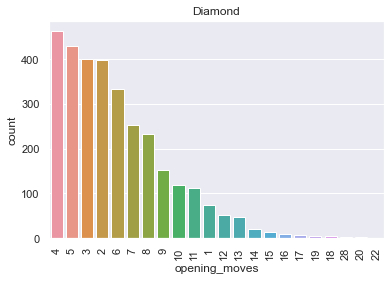

(None, None)

In [13]:
cat_opening(Diamond),cat_moves(Diamond)

# Diamonds have an average of 5.67 opening moves before diverting, and use the Sicilian Defense 16.4% of the time, with the second most often being French Defense which is around 8%.

# Now lets look at our highest rated skill group, Onyx. These are players ranked 2100+ to put this in perspective, Magnus Carlson, the highest rated player in the world is a 2800. These are exceptional players who are brilliant and make very very few mistakes. Games at this skill rating represent a little less than 5% of the games in this dataset. 

# Lets break down what makes them great. 

Onyx    791
Name: white_rank, dtype: int64
Sicilian Defense         0.192162
French Defense           0.078382
Queen's Pawn Game        0.061947
Queen's Gambit           0.053097
Ruy Lopez                0.048040
Caro-Kann Defense        0.046776
English Opening          0.045512
Italian Game             0.040455
Nimzo-Indian Defense     0.027813
Scandinavian Defense     0.025284
Indian Game              0.020228
Modern Defense           0.020228
King's Indian Defense    0.018963
Scotch Game              0.017699
Pirc Defense             0.016435
Name: opening_shortname, dtype: float64


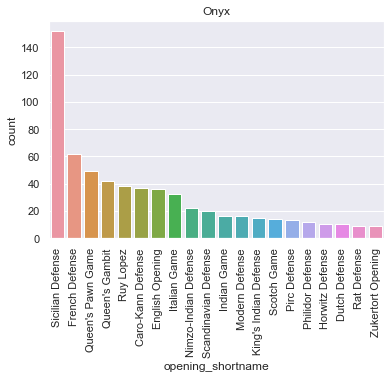

Onyx    791
Name: white_rank, dtype: int64
5     0.128951
6     0.106195
4     0.104930
2     0.097345
3     0.088496
8     0.082174
7     0.080910
9     0.073325
10    0.053097
11    0.050569
12    0.030341
1     0.022756
15    0.020228
17    0.017699
13    0.016435
Name: opening_moves, dtype: float64
count    791.000000
mean       6.756005
std        3.802715
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       24.000000
Name: opening_moves, dtype: float64


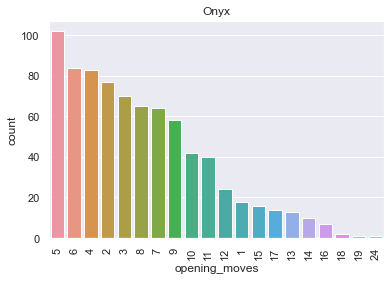

(None, None)

In [14]:
cat_opening(Onyx),cat_moves(Onyx)

# Onyx level players love the Sicilian Defense and stick to it, averaging 6.7 opening moves before making a variation from the 'book'. 

In [15]:
for cat in categories:
    print(np.mean(cat.opening_moves))

3.062176165803109
3.8475336322869955
4.400424074376121
5.030393487109905
5.6784
6.756005056890013


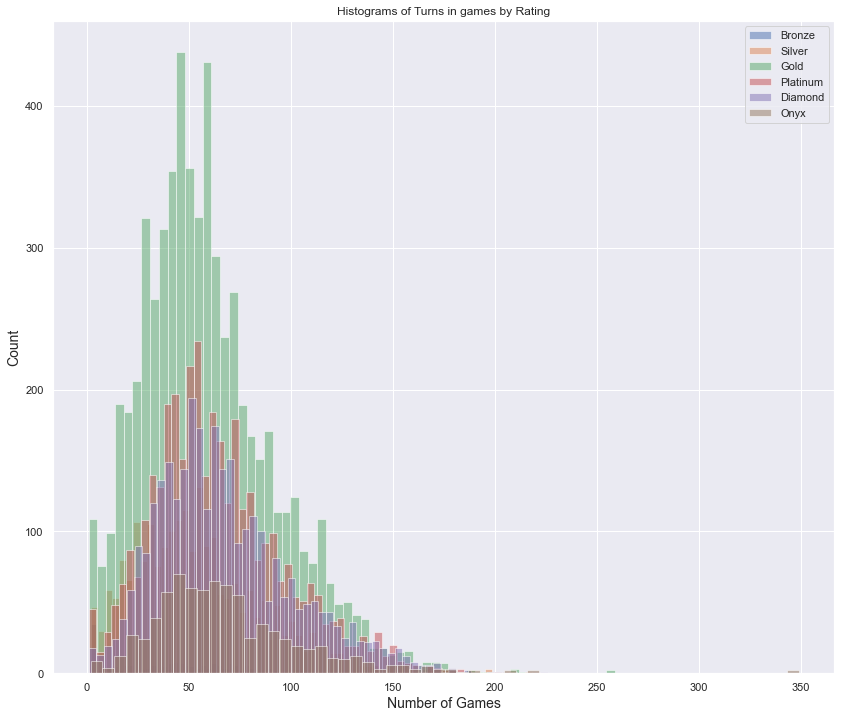

In [16]:
plt.figure(figsize=(14,12))
plt.hist(Bronze.turns,bins=60,alpha=0.5,label='Bronze')
plt.hist(Silver.turns,bins=60,alpha=0.5,label='Silver')
plt.hist(Gold.turns,bins=60,alpha=0.5,label='Gold')
plt.hist(Platinum.turns,bins=60,alpha=0.5,label='Platinum')
plt.hist(Diamond.turns,bins=60,alpha=0.5,label='Diamond')
plt.hist(Onyx.turns,bins=60,alpha=0.5,label='Onyx')
plt.xlabel('Number of Games',size=14)
plt.ylabel('Count',size=14)
plt.title('Histograms of Turns in games by Rating')
plt.legend(loc='upper right')
plt.show()

In [17]:
df.columns

Index(['Unnamed: 0', 'game_id', 'winner', 'victory_status', 'white_rating',
       'black_rating', 'white_rank', 'turns', 'black_rank', 'white_id',
       'black_id', 'opening_moves', 'opening_fullname', 'opening_shortname',
       'opening_variation', 'moves', 'upset'],
      dtype='object')

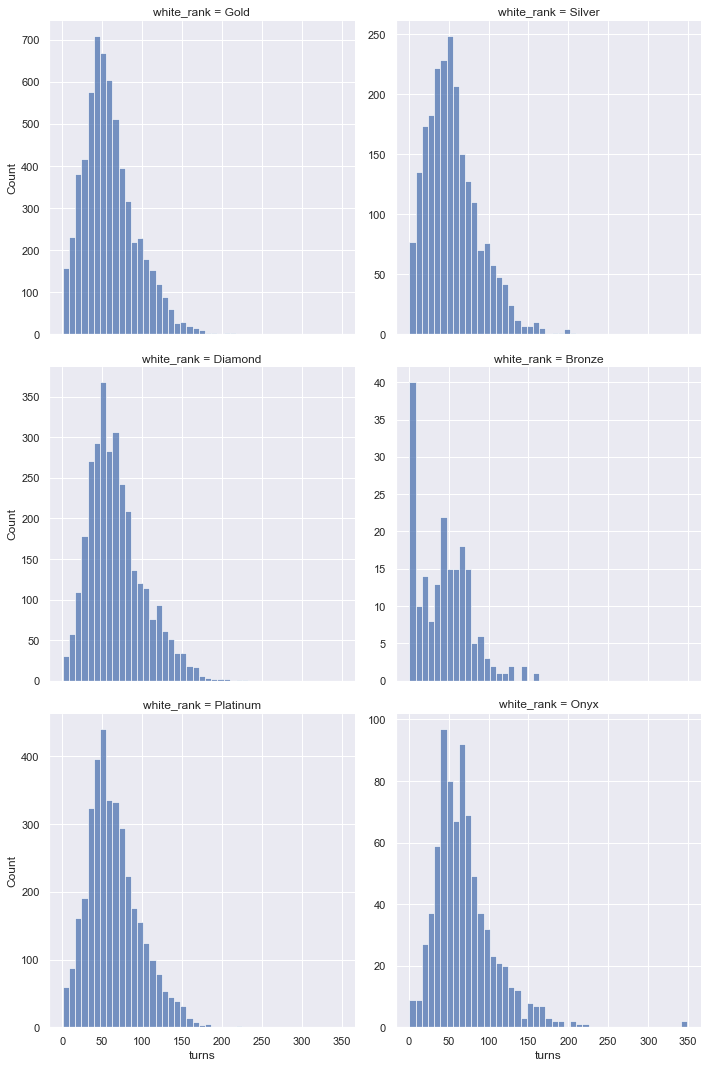

In [18]:
sns.displot(x='turns',data=df,col='white_rank',kind='hist',bins=45,col_wrap=2,facet_kws=dict(sharey=False))
plt.savefig('save_as_a_png.png')

### Why does Bronze have such a different shape from the others?

count    193.000000
mean      44.326425
std       33.260371
min        2.000000
25%       14.000000
50%       44.000000
75%       66.000000
max      163.000000
Name: turns, dtype: float64


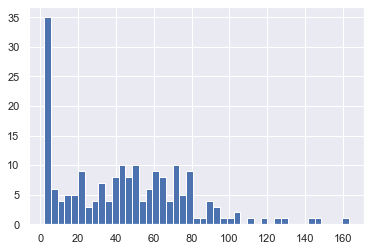

In [19]:
plt.hist(Bronze.turns,bins=45)
print(Bronze.turns.describe())

In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
grouped = Bronze.groupby(['turns','victory_status'])['game_id'].count()
grouped

turns  victory_status
2      Out of Time        1
       Resign            28
3      Resign             3
4      Out of Time        1
       Resign             2
6      Resign             1
7      Mate               1
8      Mate               1
       Out of Time        1
       Resign             1
9      Resign             1
11     Draw               1
       Resign             1
12     Resign             2
13     Resign             2
14     Mate               1
       Resign             2
18     Resign             2
19     Mate               1
       Resign             2
20     Mate               2
       Out of Time        1
21     Mate               1
       Resign             3
23     Resign             2
26     Out of Time        1
27     Draw               1
       Resign             1
28     Resign             1
30     Resign             3
31     Mate               1
32     Mate               2
       Resign             1
33     Mate               1
       Resign             

### The irregular graph of the Bronze ranked players is due to the high number of games where they resigned in the second move

In [21]:
Bronze = Bronze[Bronze.turns>2]


(array([11.,  7.,  5., 12.,  4., 10., 10., 16.,  9., 10.,  9., 13., 13.,
         6., 10.,  2.,  5.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  1.]),
 array([  3.        ,   8.33333333,  13.66666667,  19.        ,
         24.33333333,  29.66666667,  35.        ,  40.33333333,
         45.66666667,  51.        ,  56.33333333,  61.66666667,
         67.        ,  72.33333333,  77.66666667,  83.        ,
         88.33333333,  93.66666667,  99.        , 104.33333333,
        109.66666667, 115.        , 120.33333333, 125.66666667,
        131.        , 136.33333333, 141.66666667, 147.        ,
        152.33333333, 157.66666667, 163.        ]),
 <BarContainer object of 30 artists>)

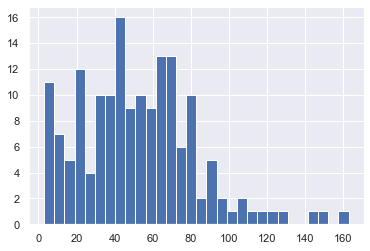

In [22]:
plt.hist(Bronze.turns,bins=30)

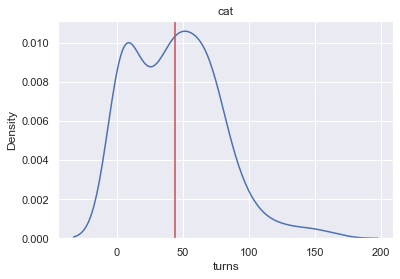

the median value is 44.0


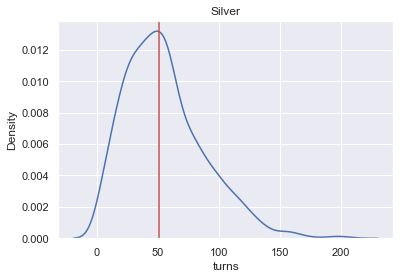

the median value is 51.0


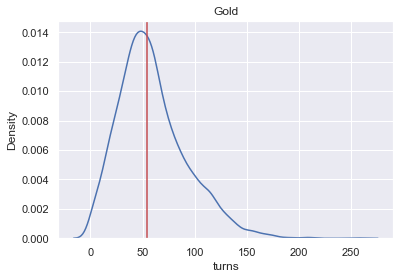

the median value is 54.0


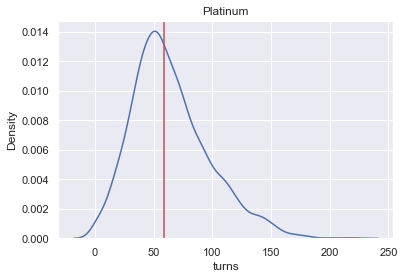

the median value is 59.0


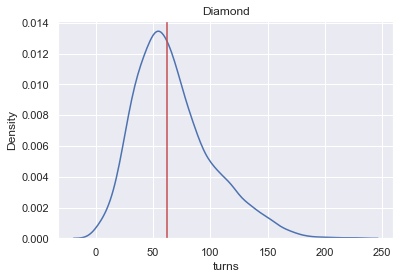

the median value is 62.0


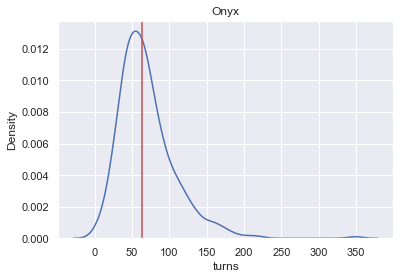

the median value is 63.0


<Figure size 432x288 with 0 Axes>

In [23]:
def kdeplot_by_cat(cat):
    sns.kdeplot(x='turns',data=cat)
    line=np.median(cat.turns)
    _ = plt.axvline(line, color='r')
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    plt.show()
    print('the median value is '+ str(line))
    plt.savefig('kde_.png',dpi=150)

for cat in categories:
    kdeplot_by_cat(cat)
